In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

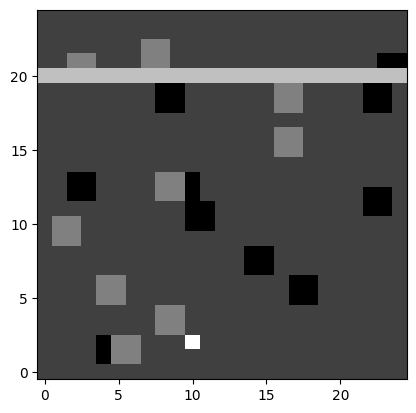

In [18]:
resolution = 1
map_size = int(25 / resolution)
map = np.zeros((map_size, map_size))
obstacles = np.random.randint(1, 24, size=(10, 2))
obstacles1 = obstacles + np.array([0, 1])
obstacles2 = obstacles + np.array([1, 0])
obstacles3 = obstacles + np.array([1, 1])

map[obstacles[:, 0], obstacles[:, 1]] = -1
map[obstacles1[:, 0], obstacles1[:, 1]] = -1
map[obstacles2[:, 0], obstacles2[:, 1]] = -1
map[obstacles3[:, 0], obstacles3[:, 1]] = -1

obstacles = np.random.randint(1, 24, size=(10, 2))
obstacles1 = obstacles + np.array([0, 1])
obstacles2 = obstacles + np.array([1, 0])
obstacles3 = obstacles + np.array([1, 1])


obstacles1 = obstacles + np.array([0, 1])
obstacles2 = obstacles + np.array([1, 0])
obstacles3 = obstacles + np.array([1, 1])

map[obstacles[:, 0], obstacles[:, 1]] = 1
map[obstacles1[:, 0], obstacles1[:, 1]] = 1
map[obstacles2[:, 0], obstacles2[:, 1]] = 1
map[obstacles3[:, 0], obstacles3[:, 1]] = 1

start_pos = (2, 10)
goals = [[int(20/resolution), i] for i in range(len(map))]
goals = np.array(goals)

temp_map = map.copy()

temp_map[goals[:, 0], goals[:, 1]] = 2
temp_map[start_pos[0], start_pos[1]] = 3
plt.imshow(temp_map, cmap='gray', origin='lower')

8.583333350718021 -0.08333335071802139


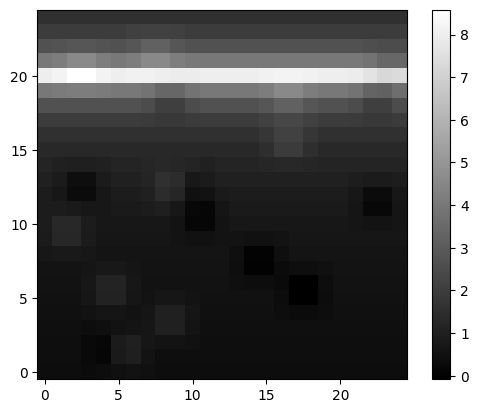

In [19]:
def get_potential(map: np.ndarray, goals: np.array) -> np.ndarray:
    # Convolve map
    kernel = np.array([[1, 1, 1], [1, 4, 1], [1, 1, 1]], dtype=np.float32)
    kernel /= np.sum(kernel)
    map = convolve2d(map, kernel, mode='same', boundary='fill', fillvalue=0)
    # map = convolve2d(map, kernel, mode='same', boundary='fill', fillvalue=0)
    
    potential = np.zeros_like(map)
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            distances = np.min(np.linalg.norm(goals - np.array([i, j]), axis=1))
            inv_distances = 8 / (1 + distances)
            potential[i, j] = map[i, j] + inv_distances
    return potential

potential = get_potential(map, goals)
print(max(potential.flatten()), min(potential.flatten()))
plt.imshow(potential, cmap='gray', origin='lower')
plt.colorbar()
plt.show()

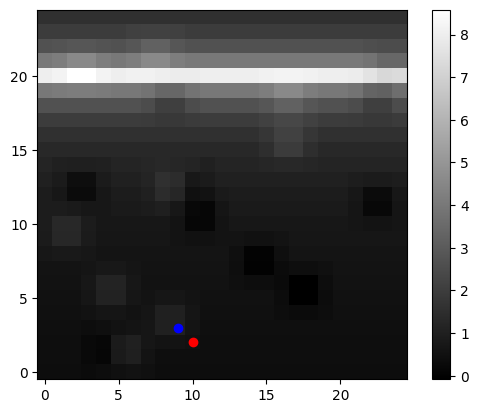

In [20]:
def get_action(pos: tuple[int, int], potential: np.ndarray) -> tuple[int, int]:
    """
    Get the next action based on the potential field
    :param pos: 
    :param potential: 
    :return: 
    """
    neighbors = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            x = np.clip(pos[0] + i, 0, potential.shape[0] - 1)
            y = np.clip(pos[1] + j, 0, potential.shape[1] - 1)
            neighbors.append((x, y))
            
    # Shuffle neighbors
    neighbors = np.random.permutation(neighbors)
            
    # Return neighbor with the highest potential
    neighbors_potential = [potential[point[0], point[1]] for point in neighbors]    
    min_index = np.argmax(neighbors_potential)
    return neighbors[min_index]

next_pos = get_action(start_pos, potential)
potential_temp = potential.copy()

plt.imshow(potential_temp, cmap='gray', origin='lower')
plt.colorbar()
plt.plot(start_pos[1], start_pos[0], 'ro')
plt.plot(next_pos[1], next_pos[0], 'bo')
plt.show()

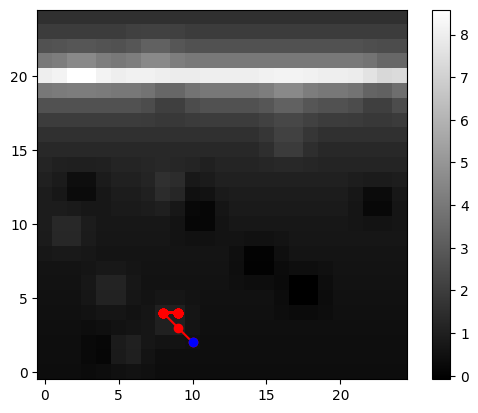

In [21]:
def get_path(start_pos: tuple[int, int], potential: np.ndarray) -> list[tuple[int, int]]:
    path = [start_pos]
    current_pos = start_pos
    for _ in range(100):
        next_pos = get_action(current_pos, potential)
        path.append(next_pos)
        current_pos = next_pos
    return path

path = get_path(start_pos, potential)
path = np.array(path)
plt.imshow(potential, cmap='gray', origin='lower')
plt.plot(path[:, 1], path[:, 0], 'ro-')
plt.plot(start_pos[1], start_pos[0], 'bo')
plt.colorbar()
plt.show()